In [2]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *

<AxesSubplot:>

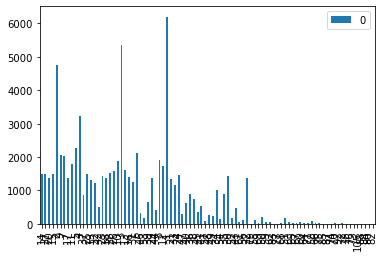

In [2]:
G = load_graph("montgomery")
#print(G.size())

G_node = len(G.nodes)

degree_dist = {}
for (node, val) in G.degree():
    if val in degree_dist:
        degree_dist[val] += 1
    else:
        degree_dist[val] = 1

df_degree = pd.DataFrame.from_dict(degree_dist, orient='index')
df_degree.plot(kind = "bar")

In [8]:
degree_sequence = [val for (node, val) in G.degree()]
tree_dg = nx.degree_sequence_tree(degree_sequence)

print(tree_dg.size())

NetworkXError: Invalid degree sequence: tree must have number of nodes equal to one less than the number of edges

In [3]:
I = set()
#with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
#    j = json.load(infile)
    #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    #infected_queue = [set(s) for s in infected_queue]
    #I = I.union(*infected_queue)
    #I = list(I)

infected_size = 1000

nodeList = list(G.nodes)

I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I

I_q = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S_q = set(G.nodes) - I_q

In [4]:
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 2000, 1, 1, 0, .8, .8)
V2_o = state.SIR_real.V2

TypeError: __init__() missing 1 required positional argument: 'snitch_rate'

In [8]:
#to_quarantine = DegGreedy(state)
#state.step(to_quarantine)
#state.step(set())

V1_k = state.SIR_known.V1
V1_r = state.SIR_real.V1

V2_k = state.SIR_known.V2
V2_r = state.SIR_real.V2

I_k = set(state.SIR_known.SIR.I)
I_r = set(state.SIR_real.SIR.I)

print("No Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_k.intersection(V1_r))) + "\t" + str(len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))) + "\t" + str(len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r)))+ "\t" + str(len(I_k.union(I_r))))
print("-----Ratio------")
print("V1:   " + str(len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r))/len(I_k.union(I_r))))
print("---Known Size----Real Size---")
print("V1:   " + str(len(V1_k)) + "\t" + str(len(V1_r)))
print("V2:   " + str(len(V2_k)) + "\t" + str(len(V2_r)))
print("I:   " + str(len(I_k)) + "\t" + str(len(I_r)))

No Quarantine Graph First Run
--Intersection-----Union---
V1:   30354	43203
V2:   11378	24650
I:   11453	14330
-----Ratio------
V1:   0.7025900979098674
V2:   0.4615821501014199
I:   0.7992323796231682
---Known Size----Real Size---
V1:   32602	40955
V2:   21951	14077
I:   11453	14330


In [ ]:
state_q = SimulationState(G, (list(S_q), list(I_q), []), (list(S_q), list(I_q), []), 2000, 1, 1, 0, .8, .8)
V2_qo = state_q.SIR_real.V2

In [9]:
to_quarantine = DepRound(state_q)
state.step(to_quarantine)

V1_kq = state_q.SIR_known.V1
V1_rq = state_q.SIR_real.V1

V2_kq = state_q.SIR_known.V2
V2_rq = state_q.SIR_real.V2

I_kq = set(state_q.SIR_known.SIR.I)
I_rq = set(state_q.SIR_real.SIR.I)

print("Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))) + "\t" + str(len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))) + "\t" + str(len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq)))+ "\t" + str(len(I_kq.union(I_rq))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq))))
print("-----Size-------")
print("V1:   " + str(len(V1_kq)) + "\t" + str(len(V1_rq)))
print("V2:   " + str(len(V2_kq)) + "\t" + str(len(V2_rq)))
print("I:   " + str(len(I_kq)) + "\t" + str(len(I_rq)))

Quarantine Graph First Run
--Intersection-----Union---
V1:   11157	13963
V2:   34913	43778
I:   997	997
-----Ratio------
V1:   0.7990403208479553
V2:   0.7975010279135639
I:   1.0
-----Size-------
V1:   11157	13963
V2:   37643	41048
I:   997	997


In [10]:
tree = nx.random_tree(G_node)
I_t = {random.randint(0, G_node-1) for i in range(0, infected_size)}
S_t = set(tree.nodes) - I_t
state_t = SimulationState(tree, (list(S_t), list(I_t), []), (list(S_t), list(I_t), []), 2000, 1, 1, 0, .8, .8)
#transmission too low --> infection never ends up spreading

In [11]:
to_quarantine = DepRound(state_t)
state_t.step(to_quarantine)

V1_kt = state_t.SIR_known.V1
V1_rt = state_t.SIR_real.V1

V2_kt = state_t.SIR_known.V2
V2_rt = state_t.SIR_real.V2

I_kt = set(state_t.SIR_known.SIR.I)
I_rt = set(state_t.SIR_real.SIR.I)

print("Tree Graph (w/ Quarantine) First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))) + "\t" + str(len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))) + "\t" + str(len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt)))+ "\t" + str(len(I_kt.union(I_rt))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))))
print("-----Size-------")
print("V1:   " + str(len(V1_kt)) + "\t" + str(len(V1_rt)))
print("V2:   " + str(len(V2_kt)) + "\t" + str(len(V2_rt)))
print("I:   " + str(len(I_kt)) + "\t" + str(len(I_rt)))

Tree Graph (w/ Quarantine) First Run
--Intersection-----Union---
V1:   104	692
V2:   147	878
I:   449	828
-----Ratio------
V1:   0.15028901734104047
V2:   0.1674259681093394
I:   0.5422705314009661
-----Size-------
V1:   104	692
V2:   147	878
I:   449	828


In [12]:
timestep_dict = {}
print("W/o Quarantine: "+ str(len(V2_r)))
print("With Quarantine: " + str(len(V2_rq)))
print("Tree: " + str(len(V2_rt)))

#timestep_dict[0] = [len(V2_k.intersection(V2_r))]
timestep_dict[0] = [len(V2_k.intersection(V2_r)), len(V2_kq.intersection(V2_rq)), len(V2_kt.intersection(V2_rt)), 
                    len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r)), len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r)),
                    len(I_k.intersection(I_r))/len(I_kt.union(I_r)), len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq)),
                    len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq)), len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq)),
                    len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt)), len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt)),
                    len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))]

V2_r -= V2_k
V2_rq -= V2_kq
V2_rt -= V2_kt

print(timestep_dict)

W/o Quarantine: 14077
With Quarantine: 41048
Tree: 878
{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661]}


In [13]:
for t in range(1, 6):
    state.step(set())
    
    to_quarantine = DepRound(state_q)
    state_q.step(to_quarantine)
    
    to_quarantine_t = DepRound(state_t)
    state_t.step(to_quarantine_t)
    
    V2_k_trial = state.SIR_known.V2
    V2_kq_trial = state_q.SIR_known.V2
    V2_kt_trial = state_t.SIR_known.V2
    
    #coverage of nodes in V2 from first timestep
    V2_intersect = len(V2_k_trial.intersection(V2_r))
    V2_qintersect = len(V2_kq_trial.intersection(V2_rq))
    V2_tintersect = len(V2_kt_trial.intersection(V2_rt))
    
    V2_r -= V2_k_trial
    V2_rq -= V2_kq_trial
    V2_rt -= V2_kt_trial
    
    #STATE w/o QUARANTINE
    V1_k = state.SIR_known.V1
    V1_r_i = state.SIR_real.V1
    V2_r_i = state.SIR_real.V2
    I_k = set(state.SIR_known.SIR.I)
    I_r_i = set(state.SIR_real.SIR.I)
    
    V1_ratio = len(V1_k.intersection(V1_r_i))/max(len(V1_k.union(V1_r_i)), 1)
    V2_ratio = len(V2_k_trial.intersection(V2_r_i))/max(len(V2_k_trial.union(V2_r_i)), 1)
    I_ratio = len(I_k.intersection(I_r_i))/max(len(I_k.union(I_r_i)), 1)
    
    #STATE w/ QUARANTINE
    V1_kq = state_q.SIR_known.V1
    V1_rq_i = state_q.SIR_real.V1
    V2_rq_i = state_q.SIR_real.V2
    I_kq = set(state_q.SIR_known.SIR.I)
    I_rq_i = set(state_q.SIR_real.SIR.I)
    
    V1_q_ratio = len(V1_kq.intersection(V1_rq_i))/max(1, len(V1_kq.union(V1_rq_i)))
    V2_q_ratio = len(V2_kq_trial.intersection(V2_rq_i))/max(1, len(V2_kq_trial.union(V2_rq_i)))
    I_q_ratio = len(I_kq.intersection(I_rq_i))/max(1, len(I_kq.union(I_rq_i)))
    
    #TREE
    V1_kt = state_t.SIR_known.V1
    V1_rt_i = state_t.SIR_real.V1
    V2_rt_i = state_t.SIR_real.V2
    I_kt = set(state_t.SIR_known.SIR.I)
    I_rt_i = set(state_t.SIR_real.SIR.I)
    
    V1_t_ratio = len(V1_kt.intersection(V1_rt_i))/max(1, len(V1_kt.union(V1_rt_i)))
    V2_t_ratio = len(V2_kt_trial.intersection(V2_rt_i))/max(1, len(V2_kt_trial.union(V2_rt_i)))
    I_t_ratio = len(I_kt.intersection(I_rt_i))/max(1, len(I_kt.union(I_rt_i)))
    
    timestep_dict[t] = [V2_intersect, V2_qintersect, V2_tintersect, V1_ratio, V2_ratio, I_ratio, V1_q_ratio, V2_q_ratio,
                       I_q_ratio, V1_t_ratio, V2_t_ratio, I_t_ratio]

print(len(V2_r), len(V2_rq), len(V2_rt))

2292 1638 731


In [14]:
print(timestep_dict)
#arr = [v[0] for k,v in timestep_dict.items()]
#arr_q = [v[1] for k,v in timestep_dict.items()]
#df = pd.DataFrame([arr, arr_q], columns = ["Without Quarantine", "With Quarantine"])
df = pd.DataFrame.from_dict(timestep_dict, orient='index', columns = ["Without Quarantine Coverage", "With Quarantine Coverage", "Tree Coverage",
                                                                     "V1 Ratio", "V2 Ratio", "I Ratio", "V1_q Ratio", "V2_q Ratio", "I_q Ratio",
                                                                     "V1_t Ratio", "V2_t Ratio", "I_t Ratio"])
print(df)

{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661], 1: [383, 4189, 0, 0.16239687364307426, 0.017666608361028513, 0.7066127634998556, 0.5574911901784699, 0.46818344465648853, 0.7654434506394717, 0.0014084507042253522, 0.0, 0.036065573770491806], 2: [24, 258, 0, 0.17781690140845072, 0.018612521150592216, 0.6111111111111112, 0.35474482198456747, 0.13374109338545936, 0.5696729181335211, 0.0, 0.0, 0.0], 3: [0, 50, 0, 0.375, 0.2222222222222222, 0.517948717948718, 0.10328875431070737, 0.010530459600433029, 0.5188052489979685, 0.0, 0.0, 0.0], 4: [0, 0, 0, 0.3333333333333333, 0.0, 0.46153846153846156, 0.09114927344782034, 0.015166835187057633, 0.34102189781021897, 0.0, 0.0, 0.0], 5: [0, 0, 0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.13895781637717122, 0.0, 0.0, 0.0]}
   Without Quarantine Coverage  With Quarantine Coverage  Tree Coverage  \
0                        11378 

<AxesSubplot:>

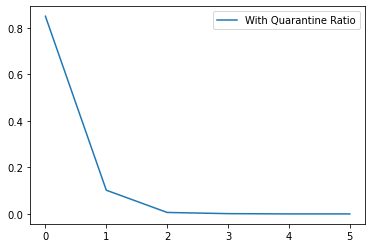

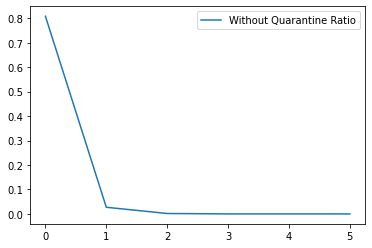

In [21]:
df["Without Quarantine Ratio"] = df["Without Quarantine Coverage"].apply(lambda x: x/14077)
df["With Quarantine Ratio"] = df["With Quarantine Coverage"].apply(lambda x: x/41048)
df.plot(y = "With Quarantine Ratio")
df.plot(y = "Without Quarantine Ratio")

   V1_q Ratio  V1_t Ratio
0    0.799040    0.150289
1    0.557491    0.001408
2    0.354745    0.000000
3    0.103289    0.000000
4    0.091149    0.000000
5    0.000000    0.000000


<AxesSubplot:>

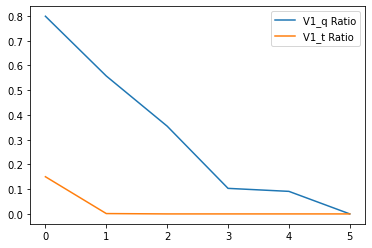

In [31]:
df_sub = df[["V1_q Ratio", "V1_t Ratio"]]
print(df_sub)
df_sub.plot()
#df.plot(y = "V1_q Ratio", "V1_t Ratio")
#df.plot(y = "V1_t Ratio")

<AxesSubplot:>

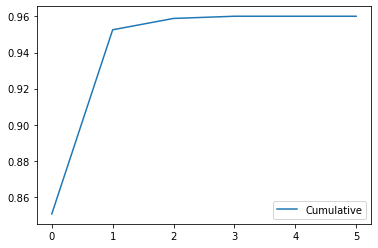

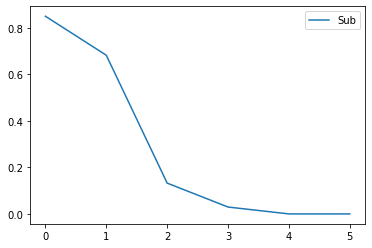

In [39]:
#CUMULATIVE is the total coverage of original V2
#SUB is the coverage of remaining uncovered per timestep

df.loc[0, 'Cumulative'] = df.loc[0, 'With Quarantine Coverage']/41048
df.loc[0, 'Sub'] = df.loc[0, 'With Quarantine Coverage']/41048
cout = 41048
for i in range(1, len(df)):
    df.loc[i, 'Cumulative'] = df.loc[i-1, 'Cumulative'] + df.loc[i, "With Quarantine Coverage"]/(41048)
    cout -= df.loc[i-1, "With Quarantine Coverage"]
    df.loc[i, "Sub"] = df.loc[i, "With Quarantine Coverage"]/( cout)

df.plot(y = "Cumulative")
df.plot(y = "Sub")

<AxesSubplot:>

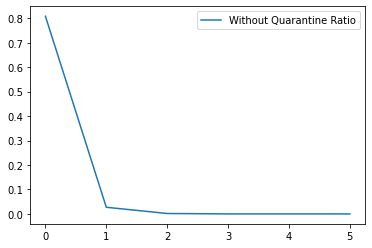

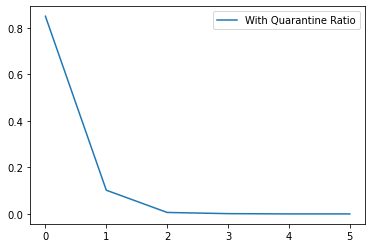

In [32]:
df.plot(y = "Without Quarantine Ratio")
df.plot(y = "With Quarantine Ratio")

In [ ]:
'''for t in range(0, 7):
    print(len(state_t.SIR_known.SIR.I), len(state_t.SIR_real.SIR.I))
    state_t.step(set())'''

In [260]:
print(len(V2_r))
V2_r -= V2_k
tree_timestep = {}
tree_timestep[1] = len(V2_k.intersection(V2_r))
for t in range(1, 10):
    to_quarantine = DepRound(state_t)
    state_t.step(to_quarantine)
    V2_kt = state_t.SIR_known.V2
    V2_tintersect = len(V2_r.intersection(V2_k))
    V2_r -= V2_k
    tree_timestep[t] = [V2_tintersect]

print(len(V2_r))

783
783


In [261]:
print(tree_timestep)

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0]}


In [51]:
compliance_rate = [random.random() for i in range(len(G.nodes()))]
node_to_compliance = {}
edge_to_compliance = {}
transmission_rate = 0.078
partial_compliance = True

compliance_edge = 0
for node in G.nodes():
    node_to_compliance[node] = compliance_rate[node]
    if not partial_compliance: compliance_edge = (0 if random.random()>compliance_rate[node] else 1, transmission_rate)
    for nbr in G.neighbors(node):
        order = (node,nbr)
        if node>nbr: order = (nbr, node)
        if partial_compliance: compliance_edge = (0 if random.random()>compliance_rate[node] else 1, transmission_rate)
        if order not in edge_to_compliance: edge_to_compliance[order] = {node: compliance_edge}
        else: edge_to_compliance[order][node] = compliance_edge

nx.set_node_attributes(G, node_to_compliance, 'compliance_rate')
nx.set_edge_attributes(G, edge_to_compliance, 'compliance_transmission')

#print(node_to_compliance[50])
print(edge_to_compliance[(7, 9)])
#print(edge_to_compliance[(9, 7)])
print("------")
print(edge_to_compliance[(7, 8)])
#print(edge_to_compliance[(8, 7)])
print("------")
print(edge_to_compliance[(7, 25866)])
#print(edge_to_compliance[(25866, 7)])
print("------")
print(edge_to_compliance[(7, 8001)])
#print(edge_to_compliance[(8001, 7)])
'''print("------")
print(G[7][9])
print(G[9][7])
print("------")
print(G[7][8])
print(G[8][7])
print("------")
print(G[7][25866])
print(G[25866][7])
print("------")
print(G[7][8001])
print(G[8001][7])
print("------")'''
for nbr in G.edges(7):
    print(G[7][nbr[1]])
for nbr in G.edges(8001):
    print(G[8001][nbr[1]])

{7: (1, 0.078), 9: (1, 0.078)}
------
{7: (1, 0.078), 8: (1, 0.078)}
------
{7: (1, 0.078), 25866: (0, 0.078)}
------
{7: (1, 0.078), 8001: (1, 0.078)}
{'compliance_transmission': {7: (1, 0.078), 8: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 9: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 8001: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 25866: (0, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 25868: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 33845: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 37022: (0, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 8003: (0, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 19013: (1, 0.078)}}
{'compliance_transmission': {7: (0, 0.078), 25867: (1, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 25870: (0, 0.078)}}
{'compliance_transmission': {7: (1, 0.078), 64213: (0, 0.078)}}
{'compliance_transmission': {7: (0, 0.078), 8005: (1, 0.078)}}
{'compliance_transmission':

In [ ]:
#INFORMATION LOSS METRIC
#1 Unreachable nodes
#    - S + R (?)
#    - cut edges
#2 Divergence per iteration (summed)
#    - How many drop out of V2 and V1 in find_excluded_contours successively?
#          - Summed over all iterations
#          - Averaged over # of iterations
#    - How they differ from real V2 and V1 in every iteration (summed)
#          - V2_real - V2_known --> how many real that are unknown
#          - V1_real - V1_known
#          - I_real - I_known
 

In [4]:
G = load_graph("montgomery")
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    
state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.078, 1, 0, .8, .8)

TypeError: __init__() missing 1 required positional argument: 'snitch_rate'

In [ ]:
agent = DegGreedy
information_loss_V1 = 0
information_loss_V2 = 0
information_loss_I = 0
while len(state.SIR_real.SIR[1]) != 0:
    to_quarantine = agent(state)
    state.step(to_quarantine)
    
    V1_real = state.SIR_real.V1
    V1_known = state.SIR_known.V1
    V2_real = state.SIR_real.V2
    V2_known = state.SIR_known.V2
    I_real = set(state.SIR_real.I)
    I_known = set(state.SIR_known.I)
    
    information_loss_V1 += len(V1_real-V1_known)
    information_loss_V2 += len(V2_real-V2_known)
    information_loss_I += len(I_real-I_known)

print(information_loss_V1, information_loss_V2, information_loss_I)

In [16]:
G.nodes[1]['quarantine'] = 1

In [17]:
G.nodes[1]['quarantine']


1

In [18]:
G.nodes[1]['happy']

KeyError: 'happy'

In [20]:
quarantine_list = [1 if node%2==0 else 0 for node in G.nodes]
print(quarantine_list)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 

In [47]:
G = load_graph("montgomery")
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    
state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.078, [1 for i in range(len(G.nodes()))], True, 0, .8, .8)

In [48]:
infections = []
total = []
while(len(state.SIR_real.SIR[1])!=0):
    infections.append(len(state.SIR_real.SIR[1]))
    infections.append(len(state.SIR_real.SIR[2]))
    to_quarantine = DegGreedy(state)
    state.step(to_quarantine)
infections.append(len(state.SIR_real.SIR[2]))
print(infections)
print(total)

KeyError: 'hid'

In [72]:
G = nx.Graph()
G.NAME = "cville"
nodes = {}
rev_nodes = []
cnode_to_labels = {}

file = open(PROJECT_ROOT / "data/raw/charlottesville.txt", "r")
file.readline()
lines = file.readlines()
c = 0
c_node=0
#ma = 0
#mi = 100000000

labels_df = pd.read_csv(PROJECT_ROOT/"data/raw/cville/cville_labels.txt")
labels_df = labels_df[["pid", "hid"]]
labels_dict = {}
for index, ids in labels_df.iterrows():
    labels_dict[ids["pid"].item()] = ids["hid"].item()

for line in lines:

    a = line.split()
    u = int(a[1])
    v = int(a[2])

    if u in nodes.keys():
        u = nodes[u]
    else:
        nodes[u] = c_node
        rev_nodes.append(u)
        cnode_to_labels[c_node] = labels_dict[u];
        u = c_node
        c_node+=1        

    if v in nodes.keys():
        v = nodes[v]
    else:
        nodes[v] = c_node
        rev_nodes.append(v)
        cnode_to_labels[c_node] = labels_dict[v];
        v = c_node
        c_node+=1

    G.add_edge(u,v)

nx.set_node_attributes(G, cnode_to_labels, 'hid')


In [73]:
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "a6.json", 'r') as infile:
        j = json.load(infile)

        (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

        # Make infected_queue a list of sets
        infected_queue = [set(s) for s in infected_queue]
        I = I.union(*infected_queue)
        I = list(I)

state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.5, [0.5 for i in range(len(G.nodes))], False, 0, 1, 1)

In [ ]:
infections = []
total = []
while len(state.SIR_real.SIR[1]) != 0:
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    #to_quarantine = DegGreedy(state)
    state.step(set({}))
total.append(len(state.SIR_real.SIR[2]))

In [ ]:
infections.append(0)
print(total)


In [67]:
nx.get_edge_attributes(G,'compliance_transmission')

{(0, 1): {0: (0, 0.5), 1: (0, 0.5)},
 (0, 2): {0: (0, 0.5), 2: (1, 0.5)},
 (0, 3): {0: (0, 0.5), 3: (0, 0.5)},
 (0, 4): {0: (0, 0.5), 4: (1, 0.5)},
 (0, 5): {0: (0, 0.5), 5: (0, 0.5)},
 (0, 6): {0: (0, 0.5), 6: (1, 0.5)},
 (0, 7): {0: (0, 0.5), 7: (0, 0.5)},
 (0, 8): {0: (0, 0.5), 8: (1, 0.5)},
 (1, 9): {1: (0, 0.5), 9: (0, 0.5)},
 (1, 10): {1: (0, 0.5), 10: (0, 0.5)},
 (2, 61784): {2: (1, 0.5), 61784: (0, 0.5)},
 (2, 31566): {2: (1, 0.5), 31566: (1, 0.5)},
 (2, 26584): {2: (1, 0.5), 26584: (0, 0.5)},
 (2, 60583): {2: (1, 0.5), 60583: (1, 0.5)},
 (2, 44850): {2: (1, 0.5), 44850: (1, 0.5)},
 (2, 76858): {2: (1, 0.5), 76858: (1, 0.5)},
 (2, 99235): {2: (1, 0.5), 99235: (1, 0.5)},
 (2, 3): {2: (1, 0.5), 3: (0, 0.5)},
 (2, 31568): {2: (1, 0.5), 31568: (0, 0.5)},
 (2, 61793): {2: (1, 0.5), 61793: (0, 0.5)},
 (2, 67334): {2: (1, 0.5), 67334: (0, 0.5)},
 (2, 7353): {2: (1, 0.5), 7353: (0, 0.5)},
 (2, 31570): {2: (1, 0.5), 31570: (1, 0.5)},
 (2, 90836): {2: (1, 0.5), 90836: (0, 0.5)},
 (2, 819

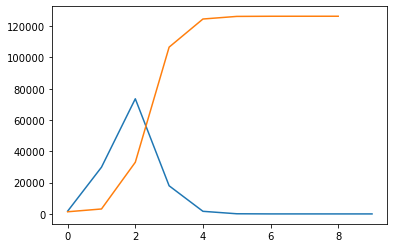

In [25]:
plt.plot(infections)
plt.plot(total)

In [18]:
print(len(G.nodes))

131219
